# Project: Wrangling and Analyze Data

##### Import required libraries

In [2]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json 
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Set some Pandas viewing options
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', None)

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
# Download twitter-archive-enhanced file directly from web and add to project.
# Import file contents into pandas dataframe called twitter_archive

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Import image_predictions.tsv using requests library

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)

# Save to local tsv file
open('image-predictions.tsv', 'wb').write(r.content)

# Load image-predictions into a dataframe
image_predtictions = pd.read_csv('image-predictions.tsv', sep='\t')

# https://www.tutorialspoint.com/downloading-files-from-web-using-python

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Note to evaluator - Not using the Twitter API since it does not work without having a paid developer account.
# Using the backup option of importing tweet_json.txt file directly from Udacity file in next code block.

# DO NOT RUN THIS CODE - adding failsafe so that this block will not run unless exec_api_code is set to True
exec_api_code = False

if exec_api_code:
    # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
    # These are hidden to comply with Twitter's API terms and conditions
    consumer_key = 'HIDDEN'
    consumer_secret = 'HIDDEN'
    access_token = 'HIDDEN'
    access_secret = 'HIDDEN'

    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)

    # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
    # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
    # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
    # NOTE TO REVIEWER: this student had mobile verification issues so the following
    # Twitter API code was sent to this student from a Udacity instructor
    # Tweet IDs for which to gather additional data via Twitter's API
    tweet_ids = twitter_archive.tweet_id.values
    len(tweet_ids)

    # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
    # Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [6]:
# Read the data from the tweet_json.txt file, line by line, into Pandas dataframe
with open('tweet_json.txt') as f:
    tweet_api = pd.DataFrame(json.loads(line) for line in f)

# Keep only the columns we need
tweet_details = tweet_api[['id', 'retweet_count', 'favorite_count']]

# https://stackoverflow.com/questions/20037430/reading-multiple-json-records-into-a-pandas-dataframe

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Twitter Archive

In [7]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archive.name.value_counts()

None              745
a                  55
Charlie            12
Oliver             11
Lucy               11
Cooper             11
Tucker             10
Penny              10
Lola               10
Bo                  9
Winston             9
the                 8
Sadie               8
Bailey              7
Daisy               7
Toby                7
an                  7
Buddy               7
Scout               6
Leo                 6
Bella               6
Stanley             6
Milo                6
Jack                6
Koda                6
Rusty               6
Dave                6
Jax                 6
Oscar               6
Larry               5
Oakley              5
Chester             5
Sammy               5
Sunny               5
Finn                5
Gus                 5
George              5
Phil                5
Alfie               5
Bentley             5
Louis               5
very                5
Ruby                4
Jeffrey             4
Maggie              4
Dexter    

In [10]:
# There are Denominator values that are not equal to 10. Might be extracted incorrectly.
twitter_archive.query('rating_denominator != 10')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [11]:
# View a sample of the text column
twitter_archive.text.sample(5)

1054                                                    This is Bell. She likes holding hands. 12/10 would definitely pet with other hand https://t.co/BXIuvkQO9b
2350                 This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe
300     This is Meera. She just heard about taxes and how much a doghouse in a nice area costs. Not pupared to be a  doggo anymore. 12/10 https://t.co/GZmNEdyoJY
950                          This is Brody. He's a lifeguard. Always prepared for rescue. 12/10 would fake drown just to get saved by him https://t.co/olDmwNjOy1
1806                    Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.co/mqvaxleHRz
Name: text, dtype: object

#### Twitter Details

In [12]:
tweet_details.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [13]:
tweet_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [14]:
tweet_details.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


#### Image Predictions

In [15]:
image_predtictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
image_predtictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_predtictions.p1.sample(25)

947                     Siamese_cat
1225           Old_English_sheepdog
1526                 cocker_spaniel
496                     Maltese_dog
441                            chow
448                            tick
1247       Chesapeake_Bay_retriever
1886                       sea_lion
1148                       lakeside
1104             Labrador_retriever
65                       toy_poodle
764                        Pembroke
1783                          boxer
213                        web_site
48                      Maltese_dog
1466                German_shepherd
1167                       Pembroke
1107               golden_retriever
497                          beagle
1806                         kelpie
2022                         tusker
2004                         Saluki
1121    soft-coated_wheaten_terrier
424                         ostrich
156                        malinois
Name: p1, dtype: object

In [18]:
image_predtictions.p2.sample(25)

229          French_bulldog
1566       golden_retriever
1414                doormat
276                   Lhasa
1891    American_black_bear
1664                 pillow
2071     Labrador_retriever
1845      Brabancon_griffon
1340     Labrador_retriever
188      miniature_pinscher
1977         Great_Pyrenees
1320         French_bulldog
925                Shih-Tzu
1919     Labrador_retriever
1609         English_setter
587              schipperke
860                Pembroke
1875            groenendael
596                  cannon
282        golden_retriever
625                     hog
1547          silky_terrier
797                     tub
1233             Pomeranian
1313           cash_machine
Name: p2, dtype: object

In [19]:
image_predtictions.p3.sample(25)

1174                        park_bench
322                   golden_retriever
431                         bloodhound
1662                           doormat
2000        Greater_Swiss_Mountain_dog
1200                    Siberian_husky
1347                             teddy
1701                  golden_retriever
1137                  miniature_poodle
1786                          Pekinese
609                             wallet
719                           Pekinese
513                            whippet
1221                           whippet
218                         Eskimo_dog
420                    standard_poodle
964                     Great_Pyrenees
1794                Labrador_retriever
463            black-and-tan_coonhound
1968    American_Staffordshire_terrier
438                        tennis_ball
16                              borzoi
700        West_Highland_white_terrier
1717                          umbrella
1062                       Boston_bull
Name: p3, dtype: object

### Quality issues
#### twitter_archive
1. Timestamp column is not in timestamp format
2. Column floofer name should be floof not floofer
3. Retweet messages should not be included, only original tweets. Columns observed: retweeted_status_id and in_reply_to_status_id
4. Columns contain missing values and are not needed for analysis. expanded_urls, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id ,retweeted_status_timestamp 
5. Columns have inconsistent case, invalid names. Columns observed: name, doggo, floof, pupper, puppo. Also fix case p1, p2, p3 in image_predictions.
6. Values above and below 10 observed in rating_denominator column.
<br>
### tweet_details
7. Rename 'id' column to tweet_id
<br>
### image_predtictions
8. Non-Dog names in columns p1, p2, p3

### Tidiness issues
1. Dog varibles doggo, floofer (floof), pupper, and puppo are in individual columns in twitter_archive and should be categorical
2. Columns from image_predictions and tweet_details should merge with twitter_archive

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [20]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
tweet_details_clean = tweet_details.copy()
image_pred_clean = image_predtictions.copy()

## Quality Issues
### Issue #1: Timestamp column is not in timestamp format

#### Define:
- In the twitter_archive_clean dataframe, change the dtype of the timestamp column to a pandas datetime. 

#### Code

In [21]:
# Convert timestamp column to pandas datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [22]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2: Column floofer name should be floof not floofer

#### Define
- In twitter_archive_clean rename column floofer to floof

#### Code

In [23]:
# Rename the column
twitter_archive_clean.rename(columns={'floofer' : 'floof'}, inplace=True)

#### Test

In [24]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floof',
 'pupper',
 'puppo']

### Issue #3: Retweet messages should not be included, only original tweets. Columns observed: retweeted_status_id and in_reply_to_status_id: 

#### Define
- Remove all rows that are retweets or replies using retweeted_status_id and in_reply_to_status_id columns.

#### Code

In [25]:
# Find the index of the retweets
retweets = twitter_archive_clean[pd.notnull(twitter_archive_clean['retweeted_status_id'])].index

# Find the index of the replys
replys = twitter_archive_clean[pd.notnull(twitter_archive_clean['in_reply_to_status_id'])].index

# Drop the rows
twitter_archive_clean.drop(index=retweets, inplace=True)
twitter_archive_clean.drop(index=replys, inplace=True)

#### Test

In [26]:
# Confirm rows were deleted. Started with 2356 rows.
twitter_archive_clean.shape

(2097, 17)

### Issue #4: Columns contain missing values and are not needed for analysis. expanded_urls, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id ,retweeted_status_timestamp

#### Define
- Drop expanded_urls, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id ,retweeted_status_timestamp columns from twitter_archive_clean

#### Code

In [27]:
# Drop the columns
to_drop = ['expanded_urls', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_id' ,'retweeted_status_timestamp']
twitter_archive_clean.drop(to_drop, axis=1, inplace=True)

#### Test

In [28]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floof',
 'pupper',
 'puppo']

### Issue #5: Columns have inconsistent case, invalid names. Columns observed: name, doggo, floof, pupper, puppo. Also fix case p1, p2, p3 in image_predictions.

#### Define
- Keep the 'None' names, and make the 'a' names 'None' as well.
- Convert all 'None" to Nan
- Change case to capitalize

#### Code

In [29]:
# Change the dog names that are 'a' to 'None'
twitter_archive_clean['name'] = twitter_archive_clean.name.replace('a', 'None')

# Change all columns that contain 'None' to NaN
cols = ['name','doggo','floof','pupper','puppo']
twitter_archive_clean[cols] = twitter_archive_clean[cols].replace('None', np.nan)

# Fix the case issues on cols by using str.capitalize()
twitter_archive_clean[cols]= twitter_archive_clean[cols].apply(lambda x: x.astype(str).str.capitalize())

cols2 = ['p1', 'p2', 'p3']
image_pred_clean[cols2] = image_pred_clean[cols2].apply(lambda x: x.astype(str).str.capitalize())


# https://www.datasciencelearner.com/convert-entire-dataframe-columns-lower-case-upper-case/

#### Test

In [30]:
# Validate that names have been capitalized
twitter_archive_clean[cols].sample(15), image_pred_clean[cols2].sample(15)

(          name  doggo floof  pupper puppo
 1205   Bubbles    Nan   Nan     Nan   Nan
 487      Oshie    Nan   Nan     Nan   Nan
 202        Nan    Nan   Nan     Nan   Nan
 67        Jack    Nan   Nan     Nan   Nan
 2326     Quite    Nan   Nan     Nan   Nan
 2353       Nan    Nan   Nan     Nan   Nan
 1863       Nan    Nan   Nan     Nan   Nan
 1348  Ralphson    Nan   Nan  Pupper   Nan
 870        Nan    Nan   Nan     Nan   Nan
 1268     Cecil    Nan   Nan     Nan   Nan
 29      Roscoe    Nan   Nan  Pupper   Nan
 727    Sampson  Doggo   Nan     Nan   Nan
 1570     Ember    Nan   Nan     Nan   Nan
 1651   Griffin    Nan   Nan     Nan   Nan
 1647       Nan    Nan   Nan  Pupper   Nan,
                     p1                  p2                        p3
 790            Bighorn               Hyena          Mexican_hairless
 1699        Dishwasher    Golden_retriever                      Chow
 1324  Golden_retriever      Cocker_spaniel        Labrador_retriever
 12        Walker_hound    Engl

### Issue #6: Values above and below 10 observed in rating_denominator column.

#### Define
- Identified multiple rows where the denominator had a value that was not 10. Adjust denominators where appropriate, and drop rows where no rating is possible.

In [31]:
# Query the clean archive to find remaining rows to be fixed
twitter_archive_clean.query('rating_denominator != 10')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [32]:
# Rows to Fix
idx_fix_den = [1068, 1165, 1662, 2335]
#idx_fix_num = {313 : 13, 784 : 14, 1068 : 14, 1165 : 13, 1202 : 11, 1662 : 10, 2335 : 9}
idx_fix_num = [[1068, 14], [1165, 13], [1662, 10], [2335, 9]]
#
# Rows to Delete
idx_del = [433, 516, 902, 1120, 1202, 1228, 1254, 1274, 1351, 1433, 1635, 1779, 1843]

# Set the denominators = 10
for i in idx_fix_den:
    twitter_archive_clean.at[i, 'rating_denominator'] = 10

# Set the numerators = new value
for i, v in idx_fix_num:
    twitter_archive_clean.at[i, 'rating_numerator'] = v

# Drop rows
twitter_archive_clean.drop(index=idx_del, inplace=True)

#### Test

In [33]:
# Expect to have zero rows
twitter_archive_clean.query('rating_denominator != 10')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator


### Issue #7: Rename column to tweet_id in twitter_details table

#### Define
- In the tweet_details_clean table, change the column name from id to tweet_id

In [34]:
# Rename the column
tweet_details_clean.rename(columns={'id' : 'tweet_id'}, inplace=True)

#### Test

In [35]:
# Display first 5 rows and validate column name has changed
tweet_details_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Issue #8: Non-Dog names in columns p1, p2, p3

#### Define
- Identify p1, p2 and p3 values that have names for images that are not dogs. Drop these rows.

#### Code

In [36]:
# Create a unique list of names to identify non-dog names.
p1 = np.array(image_pred_clean.p1.to_list())
p1_unique = np.unique(p1)
print(p1_unique)

['Acorn_squash' 'Afghan_hound' 'African_crocodile' 'African_grey'
 'African_hunting_dog' 'Agama' 'Airedale' 'Alp' 'American_black_bear'
 'American_staffordshire_terrier' 'Angora' 'Appenzeller' 'Arabian_camel'
 'Arctic_fox' 'Australian_terrier' 'Axolotl' 'Badger' 'Bakery'
 'Bald_eagle' 'Balloon' 'Banana' 'Bannister' 'Barbell' 'Barrow' 'Basenji'
 'Basketball' 'Basset' 'Bath_towel' 'Bathtub' 'Beach_wagon' 'Beagle'
 'Bearskin' 'Beaver' 'Bedlington_terrier' 'Bee_eater'
 'Bernese_mountain_dog' 'Bib' 'Bighorn' 'Binoculars' 'Birdhouse' 'Bison'
 'Black-and-tan_coonhound' 'Black-footed_ferret' 'Blenheim_spaniel'
 'Bloodhound' 'Bluetick' 'Boathouse' 'Bonnet' 'Book_jacket' 'Bookcase'
 'Bookshop' 'Border_collie' 'Border_terrier' 'Borzoi' 'Boston_bull' 'Bow'
 'Bow_tie' 'Box_turtle' 'Boxer' 'Brabancon_griffon' 'Briard'
 'Brittany_spaniel' 'Brown_bear' 'Bubble' 'Bull_mastiff' 'Bustard' 'Cairn'
 'Candle' 'Canoe' 'Car_mirror' 'Cardigan' 'Carousel' 'Carton'
 'Cash_machine' 'Cheeseburger' 'Cheetah' 'Chesa

In [37]:
# Create list of non-log names to drop and use against column p1
to_drop = ['Acorn_squash', 'African_crocodile', 'American_black_bear', 'Arabian_camel', 'Arctic_fox', 'Badger', 'Bakery',
           'Bald_eagle', 'Balloon', 'Banana', 'Bannister', 'Barbell', 'Basketball', 'Bath_towel', 'Bathtub', 'Beach_wagon', 
           'Bearskin' 'Beaver', 'Bee_eater', 'Bib', 'Bighorn', 'Binoculars', 'Birdhouse', 'Bison', 'Black-footed_ferret', 
           'Boathouse', 'Bonnet', 'Book_jacket', 'Bookcase', 'Bookshop', 'Bow', 'Bow_tie' 'Box_turtle', 'Brown_bear', 'Bubble', 
           'Candle', 'Canoe', 'Car_mirror', 'Cardigan', 'Carousel', 'Carton', 'Cash_machine', 'Cheeseburger', 'Cheetah', 
           'Chimpanzee', 'China_cabinet', 'Christmas_stocking', 'Cliff', 'Clog', 'Coffee_mug,' 'Coho', 'Coil', 'Comic_book', 
           'Common_iguana', 'Conch', 'Convertible', 'Coral_reef', 'Cougar', 'Cowboy_boot', 'Cowboy_hat', 'Crane', 'Crash_helmet', 
           'Cuirass', 'Cup', 'Desktop_computer', 'Dhole', 'Dingo', 'Dining_table', 'Dishwasher', 'Dogsled', 'Doormat', 'Dough', 
           'Earthstar', 'Egyptian_cat', 'Electric_fan', 'Envelope', 'Espresso', 'Feather_boa', 'Fiddler_crab', 'Fire_engine', 'Flamingo', 
           'Fountain', 'Four-poster', 'Frilled_lizard', 'Gas_pump', 'Geyser', 'Giant_panda', 'Gondola', 'Goose', 'Grey_fox', 
           'Guinea_pig', 'Hammer', 'Hamster', 'Hand_blower', 'Handkerchief', 'Hare', 'Harp', 'Hay', 'Hen', 'Hermit_crab', 'Hippopotamus', 
           'Hog', 'Home_theater', 'Hotdog', 'Hummingbird', 'Hyena', 'Ice_bear', 'Ice_lolly', "Jack-o'-lantern", 'Jellyfish', 'Jigsaw_puzzle', 
           'Killer_whale', 'King_penguin', 'Koala', 'Komondor', 'Lakeside', 'Laptop', 'Lawn_mower', 'Leaf_beetle', 'Leatherback_turtle', 
           'Limousine', 'Lion', 'Llama', 'Loafer', 'Long-horned_beetle', 'Lorikeet', 'Lynx', 'Madagascar_cat', 'Mailbox', 'Meerkat' 
           'Microphone', 'Microwave', 'Military_uniform', 'Minibus', 'Minivan', 'Mortarboard', 'Motor_scooter', 'Mousetrap', 'Mud_turtle', 
           'Muzzle', 'Nail', 'Orange', 'Ostrich', 'Otter', 'Ox', 'Paddle', 'Padlock', 'Panpipe', 'Paper_towel', 'Park_bench', 'Patio', 
           'Peacock', 'Pedestal', 'Pencil_box', 'Picket_fence', 'Piggy_bank', 'Pillow', 'Ping-pong_ball', 'Pitcher', 'Platypus', 'Pole', 
           'Polecat', 'Pool_table', 'Porcupine', 'Pot', 'Prayer_rug', 'Prison', 'Quilt', 'Radio_telescope', 'Rain_barrel', 'Ram', 'Rapeseed', 
           'Refrigerator', 'Remote_control', 'Restaurant', 'Revolver', 'Robin', 'Rotisserie', 'Sandbar', 'School_bus', 'Scorpion', 
           'Sea_lion', 'Sea_urchin', 'Seashore', 'Seat_belt', 'Shield', 'Shopping_basket', 'Shopping_cart', 'Shower_curtain', 'Siamese_cat', 
           'Ski_mask', 'Skunk', 'Sliding_door', 'Slug', 'Snail', 'Snorkel', 'Snowmobile', 'Soccer_ball', 'Space_heater', 'Starfish', 
           'Stone_wall', 'Stove', 'Street_sign', 'Studio_couch', 'Suit', 'Sulphur-crested_cockatoo', 'Sundial', 'Sunglasses', 'Sussex_spaniel', 
           'Swab', 'Swing', 'Syringe', 'Tabby', 'Tailed_frog', 'Teapot', 'Tennis_ball', 'Terrapin', 'Three-toed_sloth', 'Tick', 'Tiger_shark', 
           'Timber_wolf', 'Toilet_seat', 'Toilet_tissue', 'Toyshop', 'Traffic_light', 'Triceratops', 'Tricycle', 'Trombone', 'Tub', 'Upright', 
           'Vacuum', 'Walking_stick', 'Wallaby', 'Washbasin', 'Washer', 'Water_bottle', 'Water_buffalo', 'Weasel', 'Web_site', 'White_wolf', 
           'Wild_boar', 'Window_shade', 'Wombat', 'Wood_rabbit', 'Wooden_spoon', 'Wool', 'Zebra']

image_pred_clean = image_pred_clean[~image_pred_clean.p1.isin(to_drop)]

#### Test

In [38]:
# Started with 2075 rows.
image_pred_clean.p1.sample(10), image_pred_clean.shape

(1550      Labrador_retriever
 1681          French_bulldog
 1264                     Pug
 184                Chihuahua
 1420                Papillon
 1650              Pomeranian
 1249                Pembroke
 1451      Labrador_retriever
 359         Golden_retriever
 707     Bernese_mountain_dog
 Name: p1, dtype: object,
 (1569, 12))

## Tidy Issues
### Issue #1: Dog varibles doggo, floofer (floof), pupper, and puppo are in individual columns and should be categorical

#### Define
- The four dog stage columns in twitter_archive_clean need to be converted into a single categorical column called dog_stage. Using the Pandas Melt function, they will be turned into rows. The temporary variable column will be dropped and then the duplicate rows that result from the melt are dropped with an index reset.

In [39]:
# List of columns to 'melt' around
cols = ['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator', 'name']

twitter_archive_clean = twitter_archive_clean.melt(id_vars=cols, value_name='dog_stage').drop('variable', axis=1)
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.dog_stage != ''].drop_duplicates().reset_index(drop=True)

#### Test

In [40]:
# Validate that the new dog_stage column is present and contains values
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,Nan
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,Nan
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,Nan
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,Nan
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,Nan


### Issue #2: Columns from image_predictions and tweet_details should merge with twitter_archive

#### Define
- Merge columns from twitter_archive_clean with the retweet_count and favorite_count from the tweet_details_clean table. Then, bring in the image_pred_clean columns.

In [41]:
# Merge columns from tweet_details_clean and then image_pred_clean
twitter_master = pd.merge(left=twitter_archive_clean, right=tweet_details_clean, how='left', on='tweet_id')
twitter_master = pd.merge(left=twitter_master, right=image_pred_clean, how='left', on='tweet_id')

#### Test

In [42]:
# Validate that all the columns with data are present
twitter_master.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
562,781163403222056960,2016-09-28 16:07:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","We normally don't rate lobsters, but this one appears to be a really good lobster. 10/10 would pet with caution https://t.co/YkHc7U7uUy",10,10,Nan,Nan,3168,10895,https://pbs.twimg.com/media/Ctc_-BTWEAAQpZh.jpg,1.0,Shetland_sheepdog,0.973841,True,Collie,0.025188,True,Border_collie,0.000297,True
2098,834089966724603904,2017-02-21 17:18:39+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE 10/10 https://t.co/ffIH2WxwF0,10,10,Nan,Nan,2427,10971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1121,703774238772166656,2016-02-28 02:50:28+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""YOU CAN'T HANDLE THE TRUTH"" both 10/10 https://t.co/ZvxdB4i9AG",10,10,Nan,Nan,526,2020,https://pbs.twimg.com/media/CcRO8FmW4AAzazk.jpg,1.0,Labrador_retriever,0.990119,True,Chesapeake_bay_retriever,0.008026,True,Curly-coated_retriever,0.001242,True
1621,675047298674663426,2015-12-10 20:19:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a fluffy albino Bacardi Columbia mix. Excellent at the tweets. 11/10 would hug gently https://t.co/diboDRUuEI,11,10,Nan,Nan,366,1141,https://pbs.twimg.com/media/CV4_8FgXAAQOj4S.jpg,1.0,Samoyed,0.978007,True,Chow,0.007121,True,Pomeranian,0.006398,True
2068,666099513787052032,2015-11-16 03:44:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Can stand on stump for what seems like a while. Built that birdhouse? Impressive. Made friends with a squirrel. 8/10 https://t.co/Ri4nMTLq5C,8,10,Nan,Nan,73,164,https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg,1.0,Lhasa,0.582330,True,Shih-tzu,0.166192,True,Dandie_dinmont,0.089688,True
91,872122724285648897,2017-06-06 16:07:15+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kody. He's a baller. Wishes he was a little bit taller. Double dribbles often. Still 12/10 would happily get dunked on https://t.co/PKSpmiefwN,12,10,Kody,Nan,8549,35324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
817,745057283344719872,2016-06-21 00:54:33+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oliver. He's downright gorgeous as hell. Should be on the cover of Dogue. 12/10 would introduce to mom https://t.co/BkgU3rrsXA,12,10,Oliver,Nan,2585,7945,https://pbs.twimg.com/media/Clb5pLJWMAE-QS1.jpg,2.0,Shetland_sheepdog,0.963985,True,Collie,0.026206,True,Border_collie,0.004544,True
1392,684177701129875456,2016-01-05 01:00:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kulet. She's very proud of the flower she picked. Loves it dearly. 10/10 now I want a flower https://t.co/myUUwqJIs7,10,10,Kulet,Nan,764,2215,https://pbs.twimg.com/media/CX6v_JOWsAE0beZ.jpg,1.0,Chow,0.334783,True,German_shepherd,0.162647,True,Golden_retriever,0.138612,True
92,871879754684805121,2017-06-06 00:01:46+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10 https://t.co/uK6PNyeh9w,13,10,Lassie,Nan,11918,39090,https://pbs.twimg.com/media/DBmKAmBXUAE-pQ-.jpg,1.0,Shetland_sheepdog,0.969171,True,Collie,0.018261,True,Pomeranian,0.008515,True
2105,829374341691346946,2017-02-08 17:00:26+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere h

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [43]:
# Save twitter_master to csv file with no index
twitter_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Based on the data in the p1 column, Golden Retrievers are the most posted breed of dog @WeRateDogs.
2. Based on the data in the favorite_count column, Golden Retrievers are also the most liked breed of dogs, far outranking their compitition with 218 million likes!

* Fun fact: The top 4 most posted breeds, Golden Retrievers, Labrador Retrievers, Pembrokes, and Chihuahuas, were also the top 4 most liked breeds, and in the same order!

c:\Users\gbp4100\AppData\Local\anaconda3\envs\udacity\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\gbp4100\AppData\Local\anaconda3\envs\udacity\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


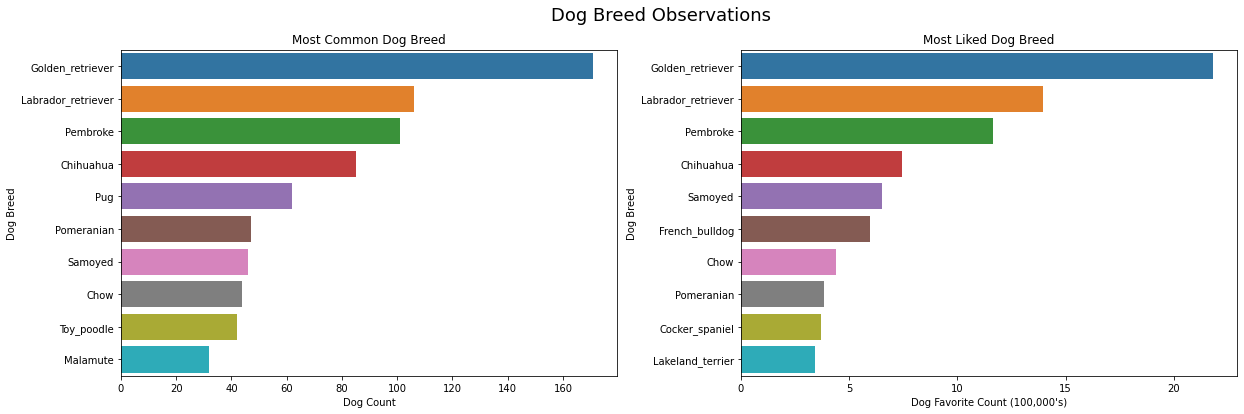

In [47]:
# Get the top 10 dog breeds
dogs = twitter_master['p1'].value_counts()[0:10].sort_values(ascending=False)

# Get the top 10 favorite dog breeds and display in 100,000's
likes = twitter_master.groupby('p1')['favorite_count'].sum().div(100000).sort_values(ascending=False)[0:10]

# Establish the Seaborn figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
fig.subplots_adjust(wspace=0.25)
fig.suptitle('Dog Breed Observations', size=18)


# Create the top 10 dog breed horizontal bar chart
sns.barplot(dogs.values, dogs.index, ax=axes[0], orient='h')
axes[0].set(ylabel='Dog Breed', xlabel='Dog Count')
axes[0].set_title('Most Common Dog Breed')

# Create the to 10 liked dog breeds horizontal bar chart
sns.barplot(likes.values, likes.index, ax=axes[1], orient='h')
axes[1].set(ylabel='Dog Breed', xlabel='Dog Favorite Count (100,000\'s)')
axes[1].set_title('Most Liked Dog Breed')

# Show the charts
plt.show()

3. Most common dog stage observed are Pupper's with 66.3% of all dogs. Doggo, Puppo and Floofer round out the dog stages. The vast majority of dog stages were null records. Further analysis might be useful in attemtping to extract additonal stages from the Tweet text field.

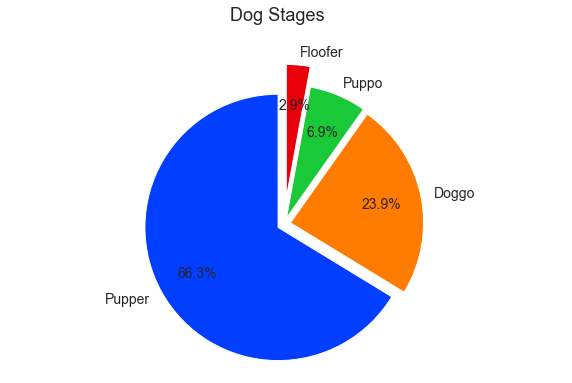

In [119]:
# Get the dog stages (These will include NaN rows)
dog_stage = twitter_master['dog_stage'].value_counts()

# Drop the first item since those are the NaN values
dog_stage = dog_stage[1:]

# Set seaborn colors
colors = sns.color_palette('bright')[0:5]
sns.set_style('whitegrid')

# Set the pie slice explode distances
explode = (0.05, 0.05, 0.05, 0.20)

# Establish the figure
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('Dog Stages', size=18)
fig.set_canvas

# Build the pie chart
axes.pie(dog_stage, labels=dog_stage.index, colors=colors, autopct='%.1f%%', pctdistance=0.7, textprops={'fontsize': 14}, explode=explode, shadow=False, startangle=90)
axes.axis('equal')

# Show the pie chart
plt.show()

# https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

### Visualization

In [120]:
dog_stage


Pupper     230
Doggo       83
Puppo       24
Floofer     10
Name: dog_stage, dtype: int64

### References
Downloading files using requests library: https://www.tutorialspoint.com/downloading-files-from-web-using-python<br>
Read Json file line by line into dataframe: https://stackoverflow.com/questions/20037430/reading-multiple-json-records-into-a-pandas-dataframe<br>
Strings that do not contain a value: https://stackoverflow.com/questions/17097643/search-for-does-not-contain-on-a-dataframe-in-pandas<br>
Convert case on multiple columns at same time: https://www.datasciencelearner.com/convert-entire-dataframe-columns-lower-case-upper-case/<br>
Pie chart formatting: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py<br>

